In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sn


In [2]:
df = pd.read_csv("cleaned_data.csv")
df

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,0.006300,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,4.0875,1,0,0,1
1,21.6,0.026944,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,4.9675,0,1,0,0
2,34.7,0.026924,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,4.9675,0,0,0,0
3,33.4,0.031857,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,6.0650,1,1,0,0
4,36.2,0.066770,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,6.0625,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.060747,41.93,0.573,6.593,69.1,19.0,9.67,9.348,12.17920,27,2.4775,0,0,1,0
502,20.6,0.044275,41.93,0.573,6.120,76.7,19.0,9.08,6.612,13.16480,20,2.2875,1,0,1,0
503,23.9,0.058986,41.93,0.573,6.976,91.0,19.0,5.64,5.478,12.19120,31,2.1675,0,0,0,0
504,22.0,0.103991,41.93,0.573,6.794,89.3,19.0,6.48,7.940,15.17600,47,2.3900,1,0,0,0


Simple Linear Regression using Statsmodels

In [3]:
# create a variable 'X' and a constant B0
X = sn.add_constant(df["room_num"])
X

,const,room_num
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147
...,...,...
501,1.0,6.593
502,1.0,6.120
503,1.0,6.976
504,1.0,6.794


In [4]:
# to fit the model
lm =sn.OLS(df["price"], X).fit()

In [5]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Fri, 21 Jul 2023   Prob (F-statistic):           1.31e-74
Time:                        13:05:37   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Linear Regression Using SKlearn

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
# Define X and Y

y = df["price"]
X = df[["room_num"]] #X should be a 2D array


In [9]:
# create Linear regression object
lm2 =LinearRegression()

In [10]:
# Fit the model
lm2.fit(X,y)

LinearRegression()

In [11]:
#print interceot and coefficient
print(lm2.intercept_, lm2.coef_)

-34.65924312309721 [9.09966966]


In [12]:
# get the predicted values of Y
lm2.predict(X)

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

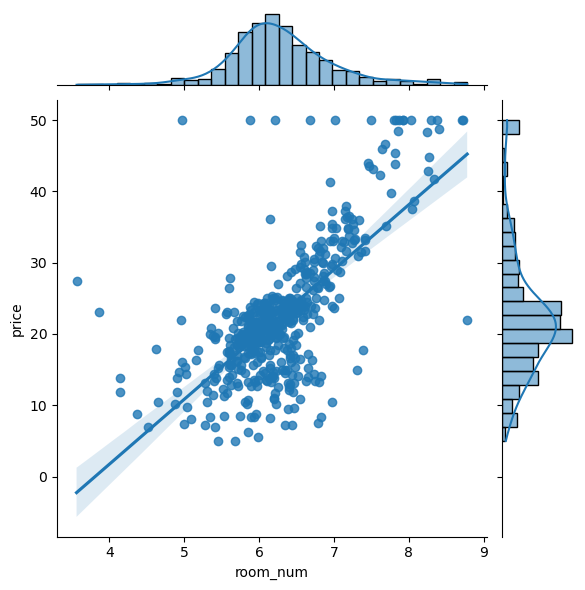

In [13]:
# plot linear regression
sns.jointplot(x =df["room_num"], y = df["price"], data=df, kind="reg")